Tweets pose specific problems to NLP, including the fact they are shorter texts. There are also plenty of platform-specific conventions to give you hassles: mentions, #hashtags, emoji, links and short-hand phrases (ikr?). Can we overcome those challenges and build a useful classifier for these two tweeters? Yes! Let's get started.

To begin, we will import all the tools we need from scikit-learn. We will need to properly vectorize our data (CountVectorizer and TfidfVectorizer). And we will also want to import some models, including MultinomialNB from the naive_bayes module, LinearSVC from the svm module and PassiveAggressiveClassifier from the linear_model module. Finally, we'll need sklearn.metrics and train_test_split and GridSearchCV from the model_selection module to evaluate and optimize our model.


In [13]:
# Set seed for reproducibility
import random; random.seed(53)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [14]:
import pandas as pd

# Load data
tweet_df = pd.read_csv('tweets.csv')

# Create target
y = tweet_df.author

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, random_state=53, test_size=0.33)

## Vectorize the tweets

In [15]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=0.05)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=0.05)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## Training a multinomial naive Bayes model

In [16]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()

# ... Train your model here ...
tfidf_nb.fit(tfidf_train, y_train)

# Run predict on your TF-IDF test data to get your predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_nb_score = metrics.accuracy_score(y_test,tfidf_nb_pred)

# Create a MulitnomialNB model
count_nb = MultinomialNB()
# ... Train your model here ...
count_nb.fit(count_train, y_train)
# Run predict on your count test data to get your predictions
count_nb_pred = tfidf_nb.predict(count_test)

# Calculate the accuracy of your predictions
count_nb_score = metrics.accuracy_score(y_test,count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.803030303030303
NaiveBayes Count Score:  0.803030303030303


## Evaluating our model using a confusion matrix

Confusion matrix, without normalization
Confusion matrix, without normalization


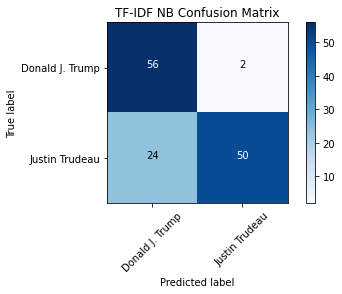

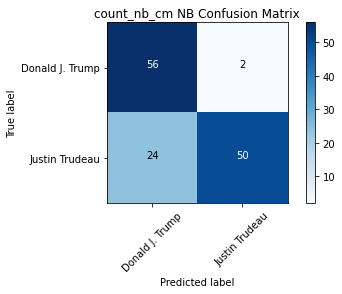

In [17]:
%matplotlib inline

from helper_functions import plot_confusion_matrix

# Calculate the confusion matrices for the tfidf_nb model and count_nb models
tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
count_nb_cm = metrics.confusion_matrix(y_test, count_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

# Plot the tfidf_nb_cm confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

# Plot the count_nb_cm confusion matrix without overwriting the first plot 
plot_confusion_matrix(count_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="count_nb_cm NB Confusion Matrix", figure=1)

## Trying out another classifier: Linear SVC

LinearSVC Score:   0.841
Confusion matrix, without normalization


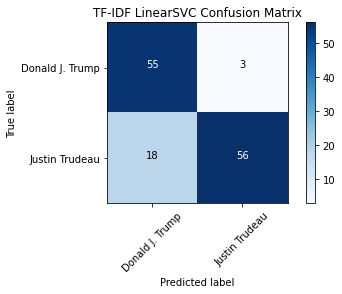

In [18]:
# Create a LinearSVM model
tfidf_svc = LinearSVC()

# ... Train your model here ...
tfidf_svc.fit(tfidf_train,y_train)

# Run predict on your tfidf test data to get your predictions
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate your accuracy using the metrics module
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred, y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Calculate the confusion matrices for the tfidf_svc model
svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
  
# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(svc_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF LinearSVC Confusion Matrix")

## Introspecting our top model

In [20]:
from helper_functions import plot_and_return_top_features

# Import pprint from pprint
from pprint import pprint

# Get the top features using the plot_and_return_top_features function and your top model and tfidf vectorizer
top_features = tfidf_vectorizer.get_feature_names()[:10]

# pprint the top features
pprint(top_features)

['amp', 'canada', 'du', 'et', 'great', 'https', 'la', 'le', 'les', 'nous']


## Bonus: can you write a Trump or Trudeau tweet?

In [21]:
# Write two tweets as strings, one which you want to classify as Trump and one as Trudeau
trump_tweet = "For our Country to be sending 80 million UNSOLICITED BALLOTS is very unfair and a roadmap to disaster. Even recent small and easier to control elections which did this are a catastrophic disaster. Fraudulent & missing Ballots like never seen before. 20% and 30% off. STOP!"
trudeau_tweet = "Canada and Ukraine are united by common values, shared priorities, and strong people-to-people ties. Today, we join our Ukrainian friends in celebrating the 29th anniversary of their country’s independence. Slava Ukraini!"

# Vectorize each tweet using the TF-IDF vectorizer's transform method
# Note: `transform` needs the string in a list object (i.e. [trump_tweet])
trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

# Call the predict method on your vectorized tweets
trump_tweet_pred = tfidf_nb.predict(trump_tweet_vectorized )
trudeau_tweet_pred = tfidf_nb.predict(trudeau_tweet_vectorized)

print("Predicted Trump tweet", trump_tweet_pred)
print("Predicted Trudeau tweet", trudeau_tweet_pred)

Predicted Trump tweet ['Donald J. Trump']
Predicted Trudeau tweet ['Justin Trudeau']
